##### Multi Arm Bandit Implementation

- Implement a multi-armed bandit algorithm. Similar to Figure 2.1 in the Sutton & Barto book (Reinforcement Learning: An Introduction), provide a solution for a n-armed bandit, where n can be 8 or 10.

- Prepare a report explaining your solution and containing your results, and discussion of the results.

- Attach the source code as separate files. For example, .ipnb - an ipython notebook file.

This code runs the bandit algorithm 1000 times, each time for 1000 steps, with an epsilon value of 0.1. It then computes the average reward over all runs and plots the result. You can adjust the values of n, num_steps, epsilon, and num_runs to experiment with different settings.

##### Implementing with straight Algorithm

In [1]:
import random

def init_bandit(n):
    q_star = [random.gauss(0, 1) for _ in range(n)]
    Q = [0.0] * n
    N = [0] * n
    return q_star, Q, N

def select_action(Q, epsilon):
    if random.random() < epsilon:
        # Explore: choose a random action
        action = random.randint(0, len(Q)-1)
    else:
        # Exploit: choose the action with highest estimate
        maxQ = max(Q)
        count = Q.count(maxQ)
        if count > 1:
            # multiple actions have the same max value, choose one randomly
            best = [i for i in range(len(Q)) if Q[i] == maxQ]
            action = random.choice(best)
        else:
            action = Q.index(maxQ)
    return action

def run_bandit(n, num_steps, epsilon):
    q_star, Q, N = init_bandit(n)
    rewards = []

    for i in range(num_steps):
        action = select_action(Q, epsilon)
        reward = random.gauss(q_star[action], 1)
        rewards.append(reward)
        N[action] += 1
        Q[action] += (reward - Q[action]) / N[action]

    return rewards


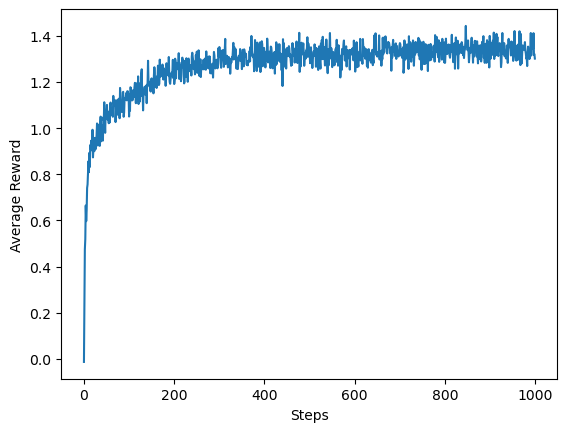

In [2]:
n = 10
num_steps = 1000
epsilon = 0.1
num_runs = 1000

avg_rewards = [0] * num_steps
for i in range(num_runs):
    rewards = run_bandit(n, num_steps, epsilon)
    avg_rewards = [avg_rewards[j] + (rewards[j] - avg_rewards[j]) / (i + 1) for j in range(num_steps)]

import matplotlib.pyplot as plt
plt.plot(avg_rewards)
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.show()

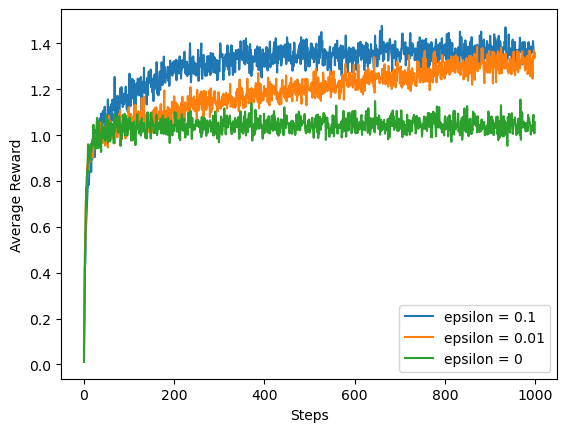

In [3]:
n = 10
num_steps = 1000
epsilons = [0.1, 0.01, 0]
num_runs = 1000

avg_rewards = [[0] * num_steps for _ in range(len(epsilons))]
for i in range(num_runs):
    for j, epsilon in enumerate(epsilons):
        rewards = run_bandit(n, num_steps, epsilon)
        avg_rewards[j] = [avg_rewards[j][k] + (rewards[k] - avg_rewards[j][k]) / (i + 1) for k in range(num_steps)]

import matplotlib.pyplot as plt
for i, epsilon in enumerate(epsilons):
    plt.plot(avg_rewards[i], label="epsilon = {}".format(epsilon))
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.legend()
plt.show()
